In [1]:
#math and array functions
import numpy as np

#functions to analyse data 
import pandas as pd

#symbolic functions
import sympy as sp

#qiskit functions
import qiskit as qk
import qiskit.quantum_info as qi

#tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits

#IBMQ functions
from qiskit import IBMQ

# Visualization
from qiskit.visualization import plot_state_city

In [2]:
#load IBM QX account
IBMQ.load_account()

#show available probiders in you IBM QX account
IBMQ.providers()

#get a real device for the execution
provider = IBMQ.get_provider(hub='ibm-q-research', group='ism-dhanbad-1', project='main')
device = provider.get_backend('ibm_lagos')

C:\Users\rs474\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


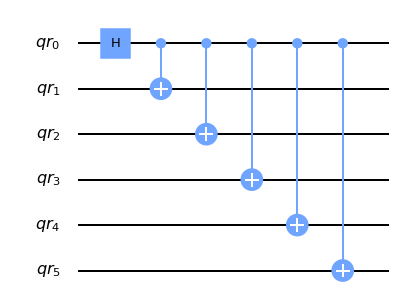

In [4]:
n_q = 6
q_reg = qk.QuantumRegister(n_q, 'qr') #quantum registers
qc = qk.QuantumCircuit(q_reg)#quantum Circuit
qc.h(0)
qc.cx(0,list(range(1,n_q)))
qc.draw(output='mpl')

In [5]:
sv = qk.quantum_info.Statevector.from_instruction(qc)
print(sv)

In [6]:
#creating list of tomography circuits
qst_cr = state_tomography_circuits(qc, q_reg)

In [7]:
#allowed number of experiments per job
max_circuits = device.configuration().max_experiments

#creating circuit list
all_cir_list = []
cir_list = []
for i in qst_cr:
    cir_list.append(i)
    if len(cir_list)==max_circuits:
        all_cir_list.append(cir_list)
        cir_list = []
all_cir_list.append(cir_list)

In [ ]:
#extracting counts from every execution
job_counts = []
for i in range(len(all_cir_list)):
    job = qk.execute(all_cir_list[i], device, shots = 1024)
    result = job.result()
    counts = result.get_counts
    job_counts.append(counts)

In [ ]:
#list of each circuit's count
count_list = []
for i in range(len(all_cir_list)):
    for j in range(len(all_cir_list[i])):
        count = job_counts[i](j)
        count_list.append(count)

In [ ]:
#save the count data as a csv file
df = pd.DataFrame(count_list)
df.fillna(value = 0, inplace = True) #to remove NaN values
df.to_csv('count_list.csv')

In [ ]:
I = sp.symbols('I')
X = sp.symbols('X')
Y = sp.symbols('Y')
Z = sp.symbols('Z')
q_0 = np.matrix([[1],[0]]) #Quantum state |0>
q_1 = np.matrix([[0],[1]]) #Quantum state |1>
q_i = q_0 + q_1
q_x = q_0 - q_1
q_y = q_0 - q_1
q_z = q_0 - q_1

In [ ]:
#number of for loop is equal to number of qubits. To increase or decrease number of 
#loops also keep in mind to edit 'mat'
sign_val = []
for i in [q_i,q_x,q_y,q_z]:
    for j in [q_i,q_x,q_y,q_z]:
        for k in [q_i,q_x,q_y,q_z]:
            for l in [q_i,q_x,q_y,q_z]:
                for m in [q_i,q_x,q_y,q_z]:
                    for n in [q_i,q_x,q_y,q_z]:
                        mat = np.kron(i,np.kron(j,np.kron(k,np.kron(l,np.kron(m,n)))))
                        sign_val.append(mat)

In [ ]:
#Combination of I,X,Y,Z; Here we take I==X, as per the condition in calculating stockes perameter. 
#we can also choose it Y or Z
XXYZ_list = []
for i in ['Y','X','Y','Z']:
    for j in ['Y','X','Y','Z']:
        for k in ['Y','X','Y','Z']:
            for l in ['Z','X','Y','Z']:
                for m in ['X','X','Y','Z']:
                    for n in ['X','X','Y','Z']:
                        XXYZ = str(i)+str(j)+str(k)+str(l)+str(m)+str(n)
                        XXYZ_list.append(XXYZ)

In [ ]:
#Combination of X, Y, Z.
XYZ_list = []
for i in ['X','Y','Z']:
    for j in ['X','Y','Z']:
        for k in ['X','Y','Z']:
            for l in ['X','Y','Z']:
                for m in ['X','Y','Z']:
                    for n in ['X','Y','Z']:
                        XYZ = str(i)+str(j)+str(k)+str(l)+str(m)+str(n)
                        XYZ_list.append(XYZ)

In [ ]:
#To make a list of numbers that maches the stockes perameter value for I,X,Y,Z and X,Y,Z.
list_numbers = []
for i in XXYZ_list:
    for j, k in enumerate(XYZ_list):
        if i==k:
            list_numbers.append(j)
            break

In [ ]:
#Create the all possible bit strings
st_list = []
for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            for l in [0, 1]:
                for m in [0, 1]:
                    for n in [0, 1]:
                        st = str(n)+str(m)+str(l)+str(k)+str(j)+str(i)
                        st_list.append(st)

In [ ]:
#read saved data
my_meas_data = pd.read_csv('D:/Rakesh/jupyter notebook/github/count_list.csv').to_dict()

In [ ]:
#T value calculation
T_value_list = []
for i, j in enumerate(list_numbers):
    T_value = 0
    for k, l in enumerate(st_list):
        T_value = T_value + ((sign_val[i][k,0])*my_meas_data[l][j])/1024
    T_value_list.append(T_value)

In [ ]:
#pauli matrices
I = np.matrix([[1,0],
           [0,1]])
X = np.matrix([[0,1],
           [1,0]])
Y = np.matrix([[0,-complex(0,1)],
           [complex(0,1),0]])
Z = np.matrix([[1,0],
           [0,-1]])

In [ ]:
#Calculating Experimental Density matrix
a = 0
rho=0
for i in [I,X,Y,Z]:
    for j in [I,X,Y,Z]:
        for k in [I, X, Y, Z]:
            for l in [I, X, Y, Z]:
                for m in [I, X, Y, Z]:
                    for n in [I, X, Y, Z]:
                        rho = rho + (.5**6)*(T_value_list[a])*(np.kron(n,np.kron(m,np.kron(l,np.kron(k,np.kron(j,i))))))
                        a=a+1

In [ ]:
#Data type conversion
exp_sv = qi.DensityMatrix(rho)

In [ ]:
#fidelity Check
fidelity1 = qi.state_fidelity(sv,exp_sv,validate=False)
print(fidelity1)

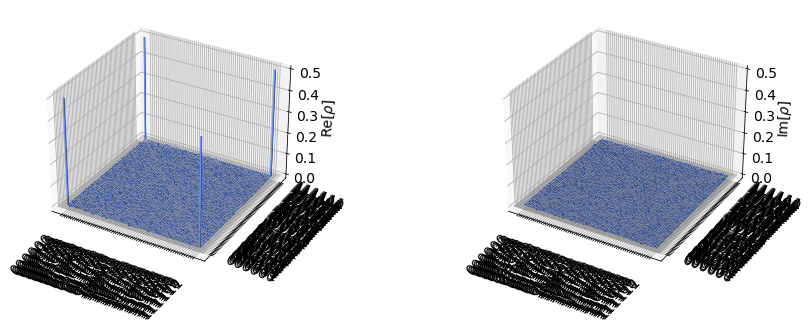

In [57]:
#Density matrix plotting
plot_state_city(exp_sv)

In [ ]:
#Density matrix plotting
plot_state_city(sv)